In [55]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
def plot_bar(labels, values, title=None, xlabel=None, ylabel=None):
  plt.bar(labels, values)
  for i in range(len(values)):
    plt.annotate('{:.3f}'.format(values[i]), xy=(labels[i], values[i]), ha='center', va='bottom')
  if xlabel is not None: 
    plt.xlabel(xlabel)
  if ylabel is not None: 
    plt.ylabel(ylabel)
  if title is not None: 
    plt.title(title)

In [36]:
def plot_confusion_matrix(matrix):
  mask = np.triu(np.ones_like(matrix, dtype=bool),k=matrix.shape[0])

  cmap = sns.diverging_palette(250, 15, s=250, l=50, center="light", as_cmap=True)

  plt.figure(figsize=(10,10))
  sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='g', square=True, cmap=cmap)
  plt.yticks(rotation=45, ha='right')

  plt.show(); 

In [37]:
df_train = pd.read_csv('./classification_df_train.csv')

In [38]:
df_test = pd.read_csv('./classification_df_test.csv')

In [39]:
X_train = df_train.drop('Species', axis=1)

In [40]:
y_train = df_train['Species']

In [41]:
X_test = df_test.drop('Species', axis=1)

In [42]:
y_test = df_test['Species']

In [43]:
params = {
  'n_neighbors':  range(10, 50, 5),
  'weights': ['uniform', 'distance'],
  'p': [1, 2]
}

In [44]:
knn_estimator = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring='accuracy')

In [45]:
knn_estimator.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [46]:
knn_estimator.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [47]:
knn_estimator.best_params_

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [48]:
knn_estimator.best_score_

0.9989537925021796

In [49]:
y_train_pred = knn_estimator.best_estimator_.predict(X_train)

In [50]:
y_test_pred = knn_estimator.best_estimator_.predict(X_test)

In [51]:
knn_accuracy_train = accuracy_score(y_train, y_train_pred)

In [52]:
conf_matrix_train_knn = confusion_matrix(y_train, y_train_pred)

In [53]:
conf_matrix_train_knn_df = pd.DataFrame(conf_matrix_train_knn, columns=y_train.unique(), index=pd.Series(y_train).unique())

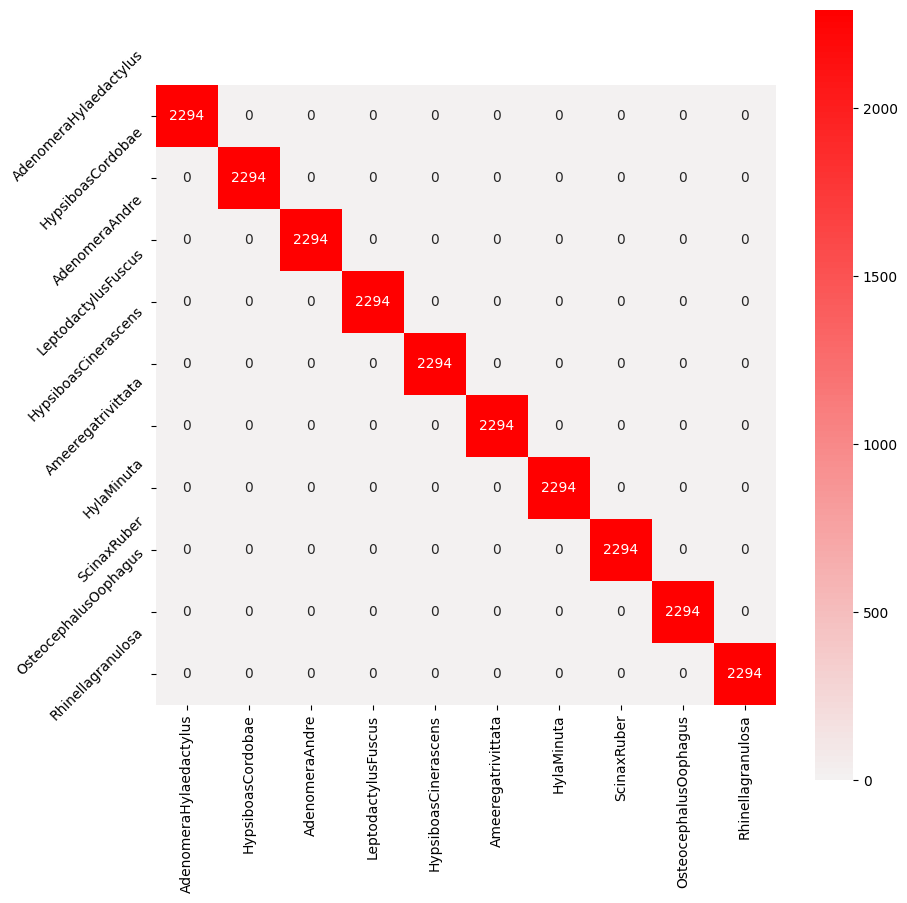

In [56]:
plot_confusion_matrix(conf_matrix_train_knn_df)

In [57]:
knn_accuracy_test = accuracy_score(y_test, y_test_pred)

In [58]:
conf_matrix_test_knn = confusion_matrix(y_test, y_test_pred)

In [59]:
conf_matrix_test_knn_df = pd.DataFrame(conf_matrix_test_knn, columns=y_test.unique(), index=pd.Series(y_test).unique())

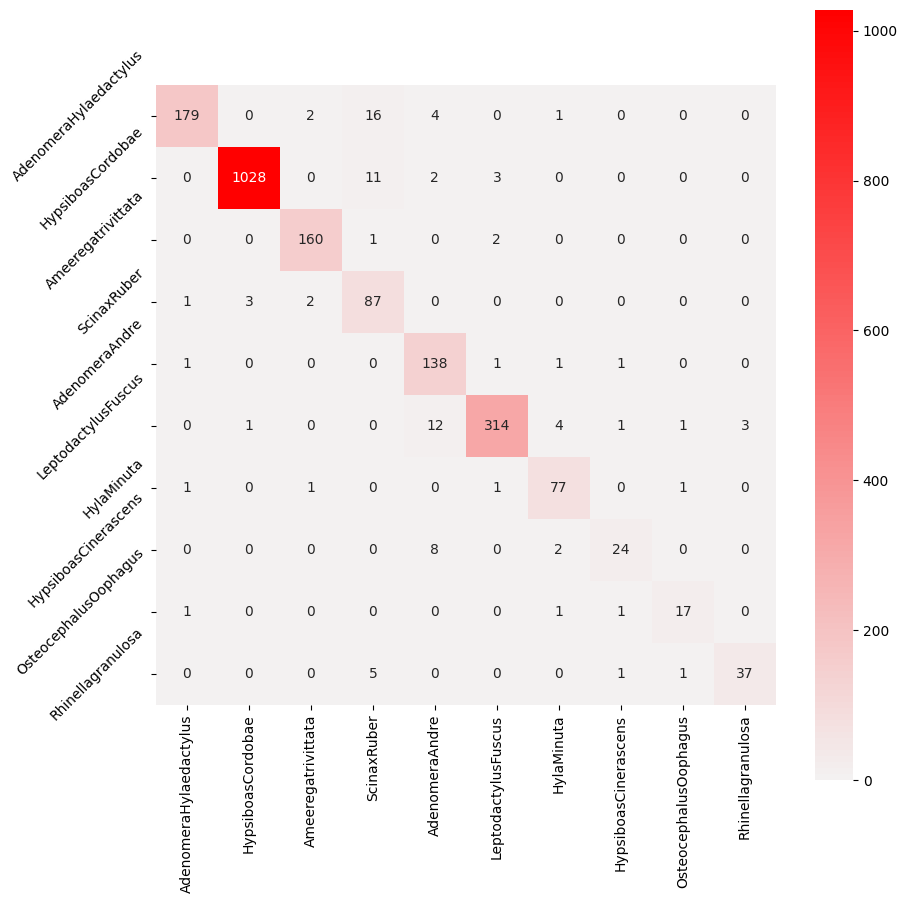

In [60]:
plot_confusion_matrix(conf_matrix_test_knn_df)

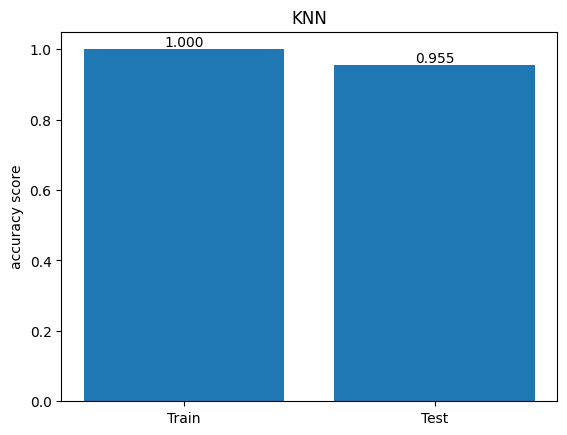

In [61]:
plot_bar(['Train', 'Test'], [knn_accuracy_train, knn_accuracy_test], title='KNN', ylabel='accuracy score')

In [62]:
from sklearn.ensemble import BaggingClassifier

In [63]:
bagging_model = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10, p=2, weights='distance'), n_estimators=20)

In [64]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10,
                                                 weights='distance'),
                  n_estimators=20)

In [65]:
y_train_pred_bag = bagging_model.predict(X_train)

In [66]:
y_test_pred_bag = bagging_model.predict(X_test)

In [67]:
bag_accuracy_train = accuracy_score(y_train, y_train_pred_bag)

In [68]:
conf_matrix_train_bag = confusion_matrix(y_train, y_train_pred_bag)

In [69]:
conf_matrix_train_bag_df = pd.DataFrame(conf_matrix_train_bag, columns=y_train.unique(), index=pd.Series(y_train).unique())

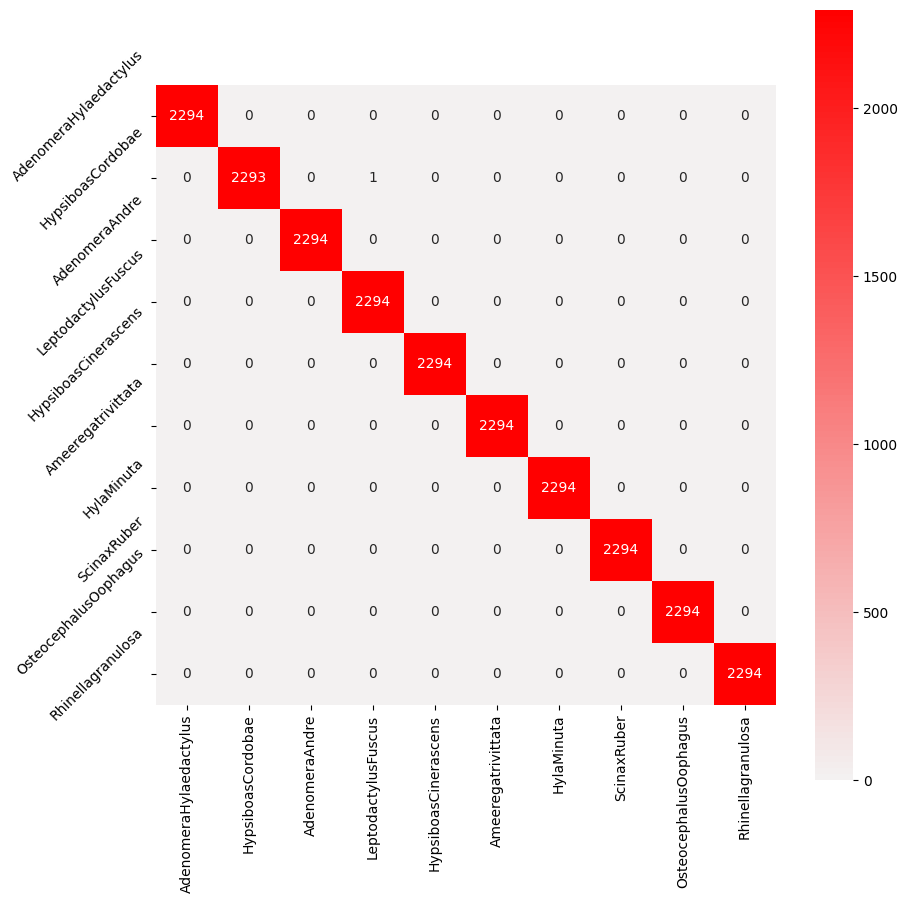

In [70]:
plot_confusion_matrix(conf_matrix_train_bag_df)

In [71]:
bag_accuracy_test = accuracy_score(y_test, y_test_pred_bag)

In [72]:
conf_matrix_test_bag = confusion_matrix(y_test, y_test_pred_bag)

In [73]:
conf_matrix_test_bag_df = pd.DataFrame(conf_matrix_test_bag, columns=y_test.unique(), index=pd.Series(y_test).unique())

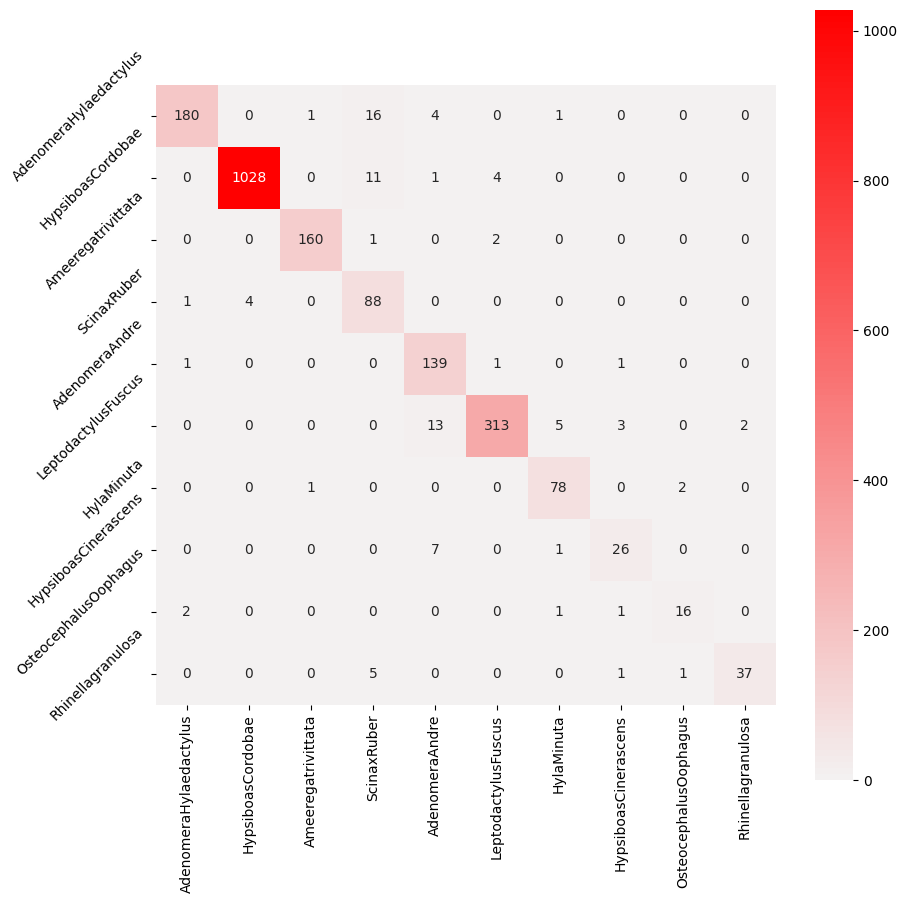

In [74]:
plot_confusion_matrix(conf_matrix_test_bag_df)

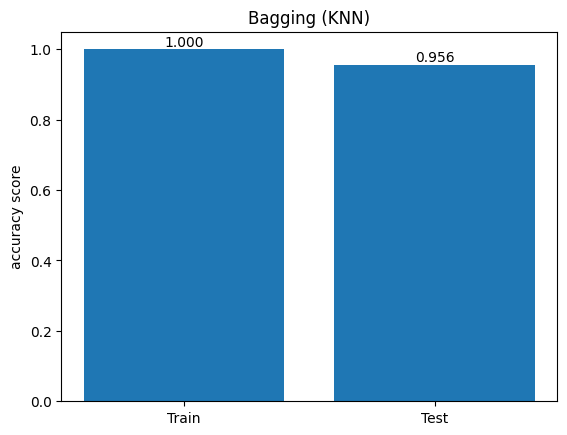

In [77]:
plot_bar(['Train', 'Test'], [bag_accuracy_train, bag_accuracy_test], title='Bagging (KNN)', ylabel='accuracy score')

In [75]:
import pickle
import os

In [76]:
output_directory = '../models/classification/'

models = [knn_estimator.best_estimator_, bagging_model]
names = ['KNN_model.pkl', 'Bagging_KNN_model.pkl']
for model, name in zip(models, names):
  try:
    with open(os.path.join(output_directory, name), 'wb') as file:
      pickle.dump(model, file)
  except IOError as err:
    print('Error while exporting model \'{}\''.format(name.split('.')[0]))
    print(err)